In [197]:
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

# we suppress ROOT warnings where our input ROOT tree has duplicate branches - these are handled correctly.
import warnings
warnings.filterwarnings("ignore", message="Found duplicate branch ")

In [198]:
# you can load the output!
import pickle
with open('out_Nov10.hist', 'rb') as f:
    out = pickle.load(f)

In [199]:
out[2017]["GluGluHToWWToLNuQQ_M125_TuneCP5_PSweight_13TeV-powheg2-jhugen727-pythia8"]["skimmed_events"]["ele"]["fj_pt"][out[2017]["GluGluHToWWToLNuQQ_M125_TuneCP5_PSweight_13TeV-powheg2-jhugen727-pythia8"]["skimmed_events"]["ele"]["fj_pt"] >0]

array([203.875, 209.25 , 276.25 , ..., 244.75 , 270.   , 308.5  ])

## Plotting histograms

In [200]:
# now we can fill the histogram with the denominator (baseline selection already applied)
skimmed_events_ele = out[2017]["GluGluHToWWToLNuQQ_M125_TuneCP5_PSweight_13TeV-powheg2-jhugen727-pythia8"]["skimmed_events"]["ele"]
skimmed_events_ele.keys()

dict_keys(['HLT_enominal', 'HLT_ejet', 'HLT_evvl', 'HLT_evvlmet', 'HLT_jet', 'HLT_eextra', 'fj_pt', 'fj_msoftdrop', 'lep_pt', 'lep_isolation', 'fj_lep_mass', 'fj_lep_dR', 'ht', 'higgspt', 'higgspt_unmatched', 'iswlepton', 'iswstarlepton'])

In [201]:
skimmed_events_mu = out[2017]["GluGluHToWWToLNuQQ_M125_TuneCP5_PSweight_13TeV-powheg2-jhugen727-pythia8"]["skimmed_events"]["mu"]
skimmed_events_mu.keys()

dict_keys(['HLT_munominal', 'HLT_muvvl', 'HLT_muvvlmet', 'HLT_jet', 'fj_pt', 'fj_msoftdrop', 'lep_pt', 'lep_isolation', 'fj_lep_mass', 'fj_lep_dR', 'ht', 'higgspt', 'higgspt_unmatched', 'iswlepton', 'iswstarlepton'])

In [202]:
skimmed_events_photon = out[2017]["GluGluHToWWToLNuQQ_M125_TuneCP5_PSweight_13TeV-powheg2-jhugen727-pythia8"]["skimmed_events"]["photon"]
skimmed_events_photon.keys()

dict_keys(['HLT_photon', 'fj_pt', 'fj_msoftdrop', 'lep_pt', 'fj_lep_mass', 'fj_lep_dR', 'ht', 'higgspt', 'higgspt_unmatched', 'iswlepton', 'iswstarlepton'])

In [203]:
out[2017]["GluGluHToWWToLNuQQ_M125_TuneCP5_PSweight_13TeV-powheg2-jhugen727-pythia8"]["skimmed_events"]["photon"].keys()

dict_keys(['HLT_photon', 'fj_pt', 'fj_msoftdrop', 'lep_pt', 'fj_lep_mass', 'fj_lep_dR', 'ht', 'higgspt', 'higgspt_unmatched', 'iswlepton', 'iswstarlepton'])

In [204]:
# now we can make histograms
import hist as hist2
region_cat = hist2.axis.StrCategory(["numerator","denominator"], name="region")
channel_cat = hist2.axis.StrCategory([], name='channel', growth=True)
trigger_cat = hist2.axis.StrCategory([], name='trigger', growth=True)

jetpt_axis = hist2.axis.Regular(25, 200, 700, name='jetpt', label=r'Jet $p_T$ [GeV]')
leppt_axis = hist2.axis.Regular(25, 10, 200, name='leppt', label=r'Lepton $p_T$ [GeV]')
hpt_axis = hist2.axis.Regular(25, 100, 700, name='higgspt', label=r'matched H $p_T$ [GeV]')
deltaR_axis = hist2.axis.Regular(20, 0, 1.5, name='deltaR', label=r'deltaR')

hists = {}
hists["jet"] = hist2.Hist(
                channel_cat,
                region_cat,
                trigger_cat,
                jetpt_axis,
                leppt_axis,
                hpt_axis,
                deltaR_axis,
            )
# now we can fill the histogram with the denominator (baseline selection already applied)
higgspt = skimmed_events_ele["higgspt"]
jetpt = skimmed_events_ele["fj_pt"]
leppt = skimmed_events_ele["lep_pt"]
deltaR = skimmed_events_ele["fj_lep_dR"]

hists["jet"].fill(
    channel="ele",
    region="denominator",
    trigger="all",
    higgspt=higgspt,
    jetpt=jetpt,
    leppt=leppt,
    deltaR=deltaR,
)
hists["jet"].fill(
    channel="ele",
    region="numerator",
    trigger="nominal",
    higgspt=higgspt[skimmed_events_ele["HLT_enominal"]],
    jetpt=jetpt[skimmed_events_ele["HLT_enominal"]],
    leppt=leppt[skimmed_events_ele["HLT_enominal"]],
    deltaR=deltaR[skimmed_events_ele["HLT_enominal"]],

)
hists["jet"].fill(
    channel="ele",
    region="numerator",
    trigger="vvl",
    higgspt=higgspt[skimmed_events_ele["HLT_evvl"]],
    jetpt=jetpt[skimmed_events_ele["HLT_evvl"]],
    leppt=leppt[skimmed_events_ele["HLT_evvl"]],
    deltaR=deltaR[skimmed_events_ele["HLT_evvl"]],    
)

hists["jet"].fill(
    channel="ele",
    region="numerator",
    trigger="met",
    higgspt=higgspt[skimmed_events_ele["HLT_evvlmet"]],
    jetpt=jetpt[skimmed_events_ele["HLT_evvlmet"]],
    leppt=leppt[skimmed_events_ele["HLT_evvlmet"]],
    deltaR=deltaR[skimmed_events_ele["HLT_evvlmet"]],    
)

hists["jet"].fill(
    channel="ele",
    region="numerator",
    trigger="jet",
    higgspt=higgspt[skimmed_events_ele["HLT_ejet"]],
    jetpt=jetpt[skimmed_events_ele["HLT_ejet"]],
    leppt=leppt[skimmed_events_ele["HLT_ejet"]],
    deltaR=deltaR[skimmed_events_ele["HLT_ejet"]],    
)

hists["jet"].fill(
    channel="ele",
    region="numerator",
    trigger="extra",
    higgspt=higgspt[skimmed_events_ele["HLT_eextra"]],
    jetpt=jetpt[skimmed_events_ele["HLT_eextra"]],
    leppt=leppt[skimmed_events_ele["HLT_eextra"]],
    deltaR=deltaR[skimmed_events_ele["HLT_eextra"]],    
)

higgspt = skimmed_events_photon["higgspt"]
jetpt = skimmed_events_photon["fj_pt"]
leppt = skimmed_events_photon["lep_pt"]
deltaR = skimmed_events_photon["fj_lep_dR"]

hists["jet"].fill(
    channel="photon",
    region="denominator",
    trigger="all",
    higgspt=higgspt,
    jetpt=jetpt,
    leppt=leppt,
    deltaR=deltaR,
)
hists["jet"].fill(
    channel="photon",
    region="numerator",
    trigger="photon",
    higgspt=higgspt[skimmed_events_photon["HLT_photon"]],
    jetpt=jetpt[skimmed_events_photon["HLT_photon"]],
    leppt=leppt[skimmed_events_photon["HLT_photon"]],
    deltaR=deltaR[skimmed_events_photon["HLT_photon"]],    
)

hists["jet"]

Hist(
  StrCategory(['ele', 'photon'], growth=True, name='channel', label='channel'),
  StrCategory(['numerator', 'denominator'], name='region', label='region'),
  StrCategory(['all', 'nominal', 'vvl', 'met', 'jet', 'extra', 'photon'], growth=True, name='trigger', label='trigger'),
  Regular(25, 200, 700, name='jetpt', label='Jet $p_T$ [GeV]'),
  Regular(25, 10, 200, name='leppt', label='Lepton $p_T$ [GeV]'),
  Regular(25, 100, 700, name='higgspt', label='matched H $p_T$ [GeV]'),
  Regular(20, 0, 1.5, name='deltaR', label='deltaR'),
  storage=Double()) # Sum: 82466.0 (266289.0 with flow)

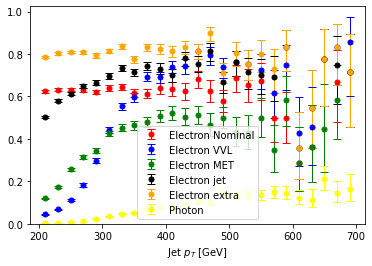

In [205]:
# now we plot trigger efficiency as function of jetpt
num_nom = hists["jet"][{"region":"numerator","channel":"ele","trigger":"nominal", 'leppt':sum, 'higgspt':sum, 'deltaR':sum}]
num_vvl = hists["jet"][{"region":"numerator","channel":"ele","trigger":"vvl", 'leppt':sum, 'higgspt':sum, 'deltaR':sum}]
num_met = hists["jet"][{"region":"numerator","channel":"ele","trigger":"met", 'leppt':sum, 'higgspt':sum, 'deltaR':sum}]
num_jet = hists["jet"][{"region":"numerator","channel":"ele","trigger":"jet", 'leppt':sum, 'higgspt':sum, 'deltaR':sum}]
num_extra = hists["jet"][{"region":"numerator","channel":"ele","trigger":"extra", 'leppt':sum, 'higgspt':sum, 'deltaR':sum}]

den = hists["jet"][{"region":"denominator","channel":"ele","trigger":sum, 'leppt':sum, 'higgspt':sum, 'deltaR':sum}]

num_photon = hists["jet"][{"region":"numerator","channel":"photon","trigger":"photon", 'leppt':sum, 'higgspt':sum, 'deltaR':sum}]
den_photon = hists["jet"][{"region":"denominator","channel":"photon","trigger":sum, 'leppt':sum, 'higgspt':sum, 'deltaR':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nom/den, 
             yerr=get_yerr(num_nom,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Electron Nominal",         
)
hep.histplot(num_vvl/den, 
             yerr=get_yerr(num_vvl,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Electron VVL",         
)
hep.histplot(num_met/den, 
             yerr=get_yerr(num_met,den),
             ax = ax,
             histtype='errorbar', color='green', capsize=4, elinewidth=1, label="Electron MET",         
)
hep.histplot(num_jet/den, 
             yerr=get_yerr(num_jet,den),
             ax = ax,
             histtype='errorbar', color='black', capsize=4, elinewidth=1, label="Electron jet",         
)
hep.histplot(num_extra/den, 
             yerr=get_yerr(num_extra,den),
             ax = ax,
             histtype='errorbar', color='orange', capsize=4, elinewidth=1, label="Electron extra",         
)
hep.histplot(num_photon/den_photon, 
             yerr=get_yerr(num_photon,den_photon),
             ax = ax,
             histtype='errorbar', color='yellow', capsize=4, elinewidth=1, label="Photon",         
)
ax.legend()
plt.savefig('plots/ele_triggers/jetpt.pdf');

/tmp/ipykernel_2178/692639788.py:17: RuntimeWarning: invalid value encountered in true_divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
/tmp/ipykernel_2178/692639788.py:17: RuntimeWarning: invalid value encountered in true_divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
/tmp/ipykernel_2178/692639788.py:17: RuntimeWarning: invalid value encountered in true_divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
/tmp/ipykernel_2178/692639788.py:17: RuntimeWarning: invalid value encountered in true_divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
/tmp/ipykernel_2178/692639788.py:17: RuntimeWarning: invalid value encountered in true_divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
/tmp/ipykernel_2178/692639788.py:17: RuntimeWarning: invalid value encountered in true_divide
 

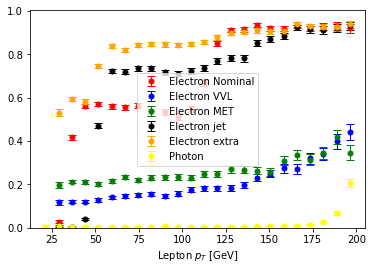

In [206]:
# now we plot trigger efficiency as function of leptonpt
num_nom = hists["jet"][{"region":"numerator","channel":"ele","trigger":"nominal", 'jetpt':sum, 'higgspt':sum, 'deltaR':sum}]
num_vvl = hists["jet"][{"region":"numerator","channel":"ele","trigger":"vvl", 'jetpt':sum, 'higgspt':sum, 'deltaR':sum}]
num_met = hists["jet"][{"region":"numerator","channel":"ele","trigger":"met", 'jetpt':sum, 'higgspt':sum, 'deltaR':sum}]
num_jet = hists["jet"][{"region":"numerator","channel":"ele","trigger":"jet", 'jetpt':sum, 'higgspt':sum, 'deltaR':sum}]
num_extra = hists["jet"][{"region":"numerator","channel":"ele","trigger":"extra", 'jetpt':sum, 'higgspt':sum, 'deltaR':sum}]

den = hists["jet"][{"region":"denominator","channel":"ele","trigger":sum, 'jetpt':sum, 'higgspt':sum, 'deltaR':sum}]

num_photon = hists["jet"][{"region":"numerator","channel":"photon","trigger":"photon", 'jetpt':sum, 'higgspt':sum, 'deltaR':sum}]
den_photon = hists["jet"][{"region":"denominator","channel":"photon","trigger":sum, 'jetpt':sum, 'higgspt':sum, 'deltaR':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nom/den, 
             yerr=get_yerr(num_nom,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Electron Nominal",         
)
hep.histplot(num_vvl/den, 
             yerr=get_yerr(num_vvl,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Electron VVL",         
)
hep.histplot(num_met/den, 
             yerr=get_yerr(num_met,den),
             ax = ax,
             histtype='errorbar', color='green', capsize=4, elinewidth=1, label="Electron MET",         
)
hep.histplot(num_jet/den, 
             yerr=get_yerr(num_jet,den),
             ax = ax,
             histtype='errorbar', color='black', capsize=4, elinewidth=1, label="Electron jet",         
)
hep.histplot(num_extra/den, 
             yerr=get_yerr(num_extra,den),
             ax = ax,
             histtype='errorbar', color='orange', capsize=4, elinewidth=1, label="Electron extra",         
)
hep.histplot(num_photon/den_photon, 
             yerr=get_yerr(num_photon,den_photon),
             ax = ax,
             histtype='errorbar', color='yellow', capsize=4, elinewidth=1, label="Photon",         
)
ax.legend()
plt.savefig('plots/ele_triggers/leppt.pdf');

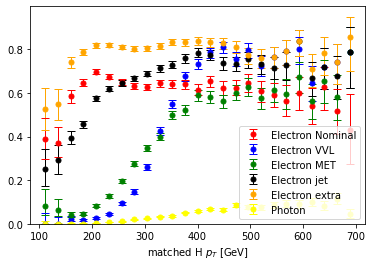

In [207]:
# now we plot trigger efficiency as function of higgspt
num_nom = hists["jet"][{"region":"numerator","channel":"ele","trigger":"nominal", 'jetpt':sum, 'leppt':sum, 'deltaR':sum}]
num_vvl = hists["jet"][{"region":"numerator","channel":"ele","trigger":"vvl", 'jetpt':sum, 'leppt':sum, 'deltaR':sum}]
num_met = hists["jet"][{"region":"numerator","channel":"ele","trigger":"met", 'jetpt':sum, 'leppt':sum, 'deltaR':sum}]
num_jet = hists["jet"][{"region":"numerator","channel":"ele","trigger":"jet", 'jetpt':sum, 'leppt':sum, 'deltaR':sum}]
num_extra = hists["jet"][{"region":"numerator","channel":"ele","trigger":"extra", 'jetpt':sum, 'leppt':sum, 'deltaR':sum}]

den = hists["jet"][{"region":"denominator","channel":"ele","trigger":sum, 'jetpt':sum, 'leppt':sum, 'deltaR':sum}]

num_photon = hists["jet"][{"region":"numerator","channel":"photon","trigger":"photon", 'jetpt':sum, 'leppt':sum, 'deltaR':sum}]
den_photon = hists["jet"][{"region":"denominator","channel":"photon","trigger":sum, 'jetpt':sum, 'leppt':sum, 'deltaR':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nom/den, 
             yerr=get_yerr(num_nom,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Electron Nominal",         
)
hep.histplot(num_vvl/den, 
             yerr=get_yerr(num_vvl,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Electron VVL",         
)
hep.histplot(num_met/den, 
             yerr=get_yerr(num_met,den),
             ax = ax,
             histtype='errorbar', color='green', capsize=4, elinewidth=1, label="Electron MET",         
)
hep.histplot(num_jet/den, 
             yerr=get_yerr(num_jet,den),
             ax = ax,
             histtype='errorbar', color='black', capsize=4, elinewidth=1, label="Electron jet",         
)
hep.histplot(num_extra/den, 
             yerr=get_yerr(num_extra,den),
             ax = ax,
             histtype='errorbar', color='orange', capsize=4, elinewidth=1, label="Electron extra",         
)
hep.histplot(num_photon/den_photon, 
             yerr=get_yerr(num_photon,den_photon),
             ax = ax,
             histtype='errorbar', color='yellow', capsize=4, elinewidth=1, label="Photon",         
)
ax.legend()
plt.savefig('plots/ele_triggers/higgpt.pdf');

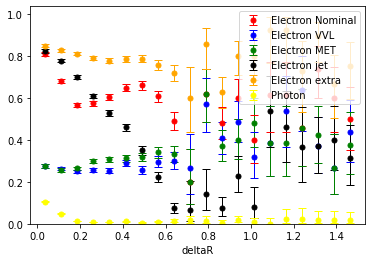

In [208]:
# now we plot trigger efficiency as function of deltaR
num_nom = hists["jet"][{"region":"numerator","channel":"ele","trigger":"nominal", 'jetpt':sum, 'leppt':sum, 'higgspt':sum}]
num_vvl = hists["jet"][{"region":"numerator","channel":"ele","trigger":"vvl", 'jetpt':sum, 'leppt':sum, 'higgspt':sum}]
num_met = hists["jet"][{"region":"numerator","channel":"ele","trigger":"met", 'jetpt':sum, 'leppt':sum, 'higgspt':sum}]
num_jet = hists["jet"][{"region":"numerator","channel":"ele","trigger":"jet", 'jetpt':sum, 'leppt':sum, 'higgspt':sum}]
num_extra = hists["jet"][{"region":"numerator","channel":"ele","trigger":"extra", 'jetpt':sum, 'leppt':sum, 'higgspt':sum}]

den = hists["jet"][{"region":"denominator","channel":"ele","trigger":sum, 'jetpt':sum, 'jetpt':sum, 'leppt':sum, 'higgspt':sum}]

num_photon = hists["jet"][{"region":"numerator","channel":"photon","trigger":"photon", 'jetpt':sum, 'leppt':sum, 'higgspt':sum}]
den_photon = hists["jet"][{"region":"denominator","channel":"photon","trigger":sum, 'jetpt':sum, 'leppt':sum, 'higgspt':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nom/den, 
             yerr=get_yerr(num_nom,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Electron Nominal",         
)
hep.histplot(num_vvl/den, 
             yerr=get_yerr(num_vvl,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Electron VVL",         
)
hep.histplot(num_met/den, 
             yerr=get_yerr(num_met,den),
             ax = ax,
             histtype='errorbar', color='green', capsize=4, elinewidth=1, label="Electron MET",         
)
hep.histplot(num_jet/den, 
             yerr=get_yerr(num_jet,den),
             ax = ax,
             histtype='errorbar', color='black', capsize=4, elinewidth=1, label="Electron jet",         
)
hep.histplot(num_extra/den, 
             yerr=get_yerr(num_extra,den),
             ax = ax,
             histtype='errorbar', color='orange', capsize=4, elinewidth=1, label="Electron extra",         
)
hep.histplot(num_photon/den_photon, 
             yerr=get_yerr(num_photon,den_photon),
             ax = ax,
             histtype='errorbar', color='yellow', capsize=4, elinewidth=1, label="Photon",         
)
ax.legend()
plt.savefig('plots/ele_triggers/deltaR.pdf');

In [209]:
# now we can make histograms for isolation, ht
import hist as hist2
region_cat = hist2.axis.StrCategory(["numerator","denominator"], name="region")
channel_cat = hist2.axis.StrCategory([], name='channel', growth=True)
trigger_cat = hist2.axis.StrCategory([], name='trigger', growth=True)

ht_axis = hist2.axis.Regular(20,180, 1500, name='ht', label=r'HT [GeV]')
lepiso_axis = hist2.axis.Regular(20, 0, 3.5, name='lepiso', label=r'Lepton isolation')

hists = {}
hists["jet"] = hist2.Hist(
                channel_cat,
                region_cat,
                trigger_cat,
                lepiso_axis,
                ht_axis,
            )
# now we can fill the histogram with the denominator (baseline selection already applied)
lepiso = skimmed_events_ele["lep_isolation"]
ht = skimmed_events_ele["ht"]

hists["jet"].fill(
    channel="ele",
    region="denominator",
    trigger="all",
    lepiso=lepiso,
    ht=ht

)
hists["jet"].fill(
    channel="ele",
    region="numerator",
    trigger="nominal",
    lepiso=lepiso[skimmed_events_ele["HLT_enominal"]],
    ht=ht[skimmed_events_ele["HLT_enominal"]],

)
hists["jet"].fill(
    channel="ele",
    region="numerator",
    trigger="vvl",  
    lepiso=lepiso[skimmed_events_ele["HLT_evvl"]],
    ht=ht[skimmed_events_ele["HLT_evvl"]],
)

hists["jet"].fill(
    channel="ele",
    region="numerator",
    trigger="met",  
    lepiso=lepiso[skimmed_events_ele["HLT_evvlmet"]],
    ht=ht[skimmed_events_ele["HLT_evvlmet"]],
)
hists["jet"].fill(
    channel="ele",
    region="numerator",
    trigger="jet",
    lepiso=lepiso[skimmed_events_ele["HLT_evvlmet"]],
    ht=ht[skimmed_events_ele["HLT_evvlmet"]],  
)
hists["jet"].fill(
    channel="ele",
    region="numerator",
    trigger="extra",
    lepiso=lepiso[skimmed_events_ele["HLT_eextra"]],
    ht=ht[skimmed_events_ele["HLT_eextra"]],  
)

# lepiso = skimmed_events_photon["lep_isolation"]
# ht = skimmed_events_photon["ht"]

# hists["jet"].fill(
#     channel="photon",
#     region="denominator",
#     trigger="all",
#     lepiso=lepiso,
#     ht=ht,
# )
# hists["jet"].fill(
#     channel="photon",
#     region="numerator",
#     trigger="photon",
#     lepiso=lepiso[skimmed_events_photon["HLT_photon"]],
#     ht=ht[skimmed_events_photon["HLT_photon"]],   
# )

hists["jet"]

Hist(
  StrCategory(['ele'], growth=True, name='channel', label='channel'),
  StrCategory(['numerator', 'denominator'], name='region', label='region'),
  StrCategory(['all', 'nominal', 'vvl', 'met', 'jet', 'extra'], growth=True, name='trigger', label='trigger'),
  Regular(20, 0, 3.5, name='lepiso', label='Lepton isolation'),
  Regular(20, 180, 1500, name='ht', label='HT [GeV]'),
  storage=Double()) # Sum: 85128.0 (85666.0 with flow)

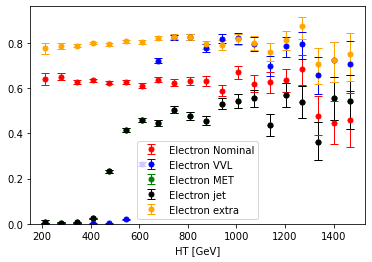

In [210]:
# now we plot trigger efficiency as function of ht
num_nom = hists["jet"][{"region":"numerator","channel":"ele","trigger":"nominal", 'lepiso':sum}]
num_vvl = hists["jet"][{"region":"numerator","channel":"ele","trigger":"vvl", 'lepiso':sum}]
num_met = hists["jet"][{"region":"numerator","channel":"ele","trigger":"met", 'lepiso':sum}]
num_jet = hists["jet"][{"region":"numerator","channel":"ele","trigger":"jet", 'lepiso':sum}]
num_extra = hists["jet"][{"region":"numerator","channel":"ele","trigger":"extra", 'lepiso':sum}]

den = hists["jet"][{"region":"denominator","channel":"ele","trigger":sum, 'lepiso':sum}]

# num_photon = hists["jet"][{"region":"numerator","channel":"photon","trigger":"photon"}]
# den_photon = hists["jet"][{"region":"denominator","channel":"photon","trigger":sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nom/den, 
             yerr=get_yerr(num_nom,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Electron Nominal",         
)
hep.histplot(num_vvl/den, 
             yerr=get_yerr(num_vvl,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Electron VVL",         
)
hep.histplot(num_met/den, 
             yerr=get_yerr(num_met,den),
             ax = ax,
             histtype='errorbar', color='green', capsize=4, elinewidth=1, label="Electron MET",         
)
hep.histplot(num_jet/den, 
             yerr=get_yerr(num_jet,den),
             ax = ax,
             histtype='errorbar', color='black', capsize=4, elinewidth=1, label="Electron jet",         
)
hep.histplot(num_extra/den, 
             yerr=get_yerr(num_extra,den),
             ax = ax,
             histtype='errorbar', color='orange', capsize=4, elinewidth=1, label="Electron extra",         
)
# hep.histplot(num_photon/den_photon, 
#              yerr=get_yerr(num_photon,den_photon),
#              ax = ax,
#              histtype='errorbar', color='yellow', capsize=4, elinewidth=1, label="Photon",         
# )
ax.legend()
plt.savefig('plots/ele_triggers/ht.pdf');

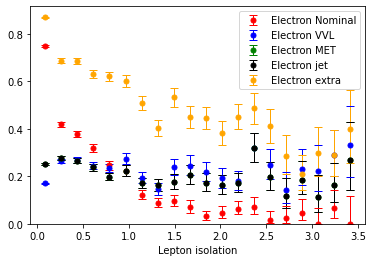

In [211]:
# now we plot trigger efficiency as function of lep_isolation
num_nom = hists["jet"][{"region":"numerator","channel":"ele","trigger":"nominal", 'ht':sum}]
num_vvl = hists["jet"][{"region":"numerator","channel":"ele","trigger":"vvl", 'ht':sum}]
num_met = hists["jet"][{"region":"numerator","channel":"ele","trigger":"met", 'ht':sum}]
num_jet = hists["jet"][{"region":"numerator","channel":"ele","trigger":"jet", 'ht':sum}]
num_extra = hists["jet"][{"region":"numerator","channel":"ele","trigger":"extra", 'ht':sum}]

den = hists["jet"][{"region":"denominator","channel":"ele","trigger":sum, 'ht':sum}]

# num_photon = hists["jet"][{"region":"numerator","channel":"photon","trigger":"photon"}]
# den_photon = hists["jet"][{"region":"denominator","channel":"photon","trigger":sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nom/den, 
             yerr=get_yerr(num_nom,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Electron Nominal",         
)
hep.histplot(num_vvl/den, 
             yerr=get_yerr(num_vvl,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Electron VVL",         
)
hep.histplot(num_met/den, 
             yerr=get_yerr(num_met,den),
             ax = ax,
             histtype='errorbar', color='green', capsize=4, elinewidth=1, label="Electron MET",         
)
hep.histplot(num_jet/den, 
             yerr=get_yerr(num_jet,den),
             ax = ax,
             histtype='errorbar', color='black', capsize=4, elinewidth=1, label="Electron jet",         
)
hep.histplot(num_extra/den, 
             yerr=get_yerr(num_extra,den),
             ax = ax,
             histtype='errorbar', color='orange', capsize=4, elinewidth=1, label="Electron extra",         
)
# hep.histplot(num_photon/den_photon, 
#              yerr=get_yerr(num_photon,den_photon),
#              ax = ax,
#              histtype='errorbar', color='yellow', capsize=4, elinewidth=1, label="Photon",         
# )
ax.legend()
plt.savefig('plots/ele_triggers/lepiso.pdf');

## Plotting distribution

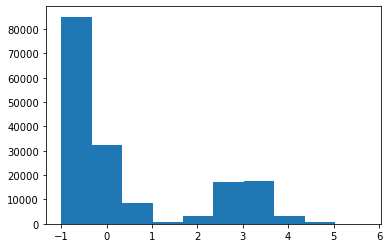

In [151]:
### plotting deltaR distribution
plt.hist(deltaR);

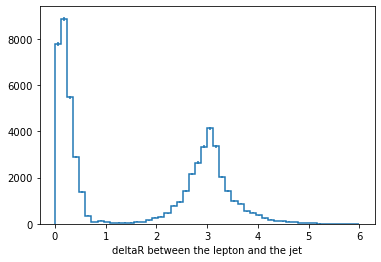

In [71]:
### plotting deltaR distribution
deltaR_axis = hist2.axis.Regular(50,0,6, name='deltaR', label=r'deltaR between the lepton and the jet')

hists = hist2.Hist(
                deltaR_axis,
            )
# now we can fill the histogram with the denominator (baseline selection already applied)
hists.fill(deltaR)
hep.histplot(hists.fill(deltaR));

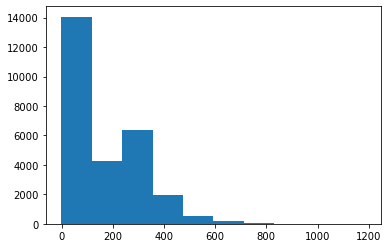

In [72]:
### plotting deltaR distribution
plt.hist(higgspt);

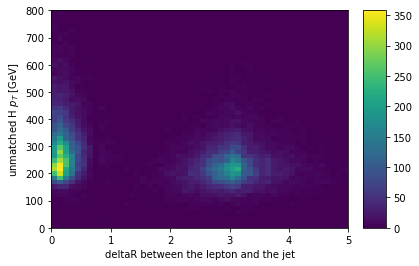

In [73]:
### plotting deltaR distribution
deltaR_axis = hist2.axis.Regular(50,0,5, name='deltaR', label=r'deltaR between the lepton and the jet')
hpt_axis = hist2.axis.Regular(50, 0, 800, name='higgspt_unmatched', label=r'unmatched H $p_T$ [GeV]')

hists = hist2.Hist(
                deltaR_axis,
                hpt_axis,
            )
# now we can fill the histogram with the denominator (baseline selection already applied)
hists.fill(deltaR, higgspt_unmatched)
fig, ax = plt.subplots(1, 1)
hep.hist2dplot(hists, labels=False)
plt.savefig('plots/unmatchedhiggs_vs_deltaR.pdf');

In [74]:
higgspt = skimmed_events_ele["higgspt"]
higgspt_unmatched = skimmed_events_ele["higgspt_unmatched"]

jetpt = skimmed_events_ele["fj_pt"]
leppt = skimmed_events_ele["lep_pt"]
deltaR = skimmed_events_ele["fj_lep_dR"]

In [75]:
deltaR

array([2.46007943, 0.34411657, 3.3775034 , ..., 3.07294774, 0.13371871,
       0.12738205])

In [76]:
higgspt_unmatched[deltaR<1.5].min()

20.8125